In [187]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.datasets import make_classification

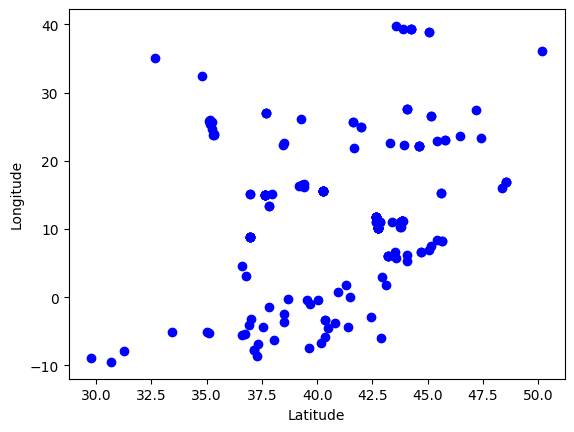

In [188]:
data = pd.read_csv('zerynthia_data.csv')
X = data[["Latitude", "Longitude"]]
# Visualize data point
plt.scatter(X["Latitude"], X["Longitude"], c="blue")
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.show()


In [189]:
model = KMeans(n_clusters=7,n_init='auto')


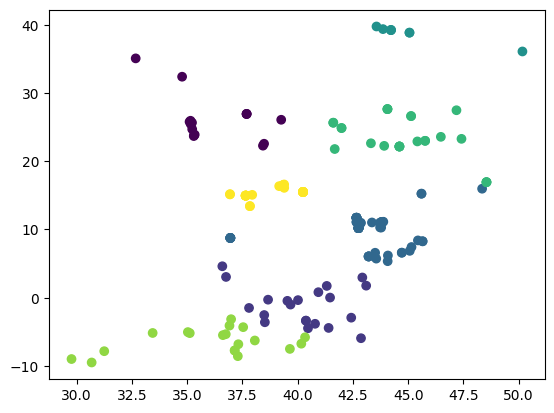

[5 5 5 5 5 5 5 1 5 1 1 1 1 1 1 1 1 5 5 5 1 5 1 2 1 2 5 1 1 1 1 1 1 2 1 5 5
 5 5 2 2 2 1 2 4 2 4 0 0 3 4 4 4 4 4 4 4 4 2 2 2 2 2 2 2 2 2 2 4 4 4 0 0 4
 0 0 0 4 4 4 4 0 4 4 4 4 4 4 4 2 2 2 2 2 2 1 0 0 0 0 0 0 0 0 6 6 6 6 6 2 6
 6 6 6 2 2 6 6 6 6 2 6 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 6 2 2 2 2
 2 2 2 2 2 2 2 2 6 6 6 6 6 6 6 6 6 6 6 6 6 5 5 3 3 3 3 3 3 3]


In [190]:
dataset = pd.DataFrame(data.iloc[:, [3, 4]].values)
model.fit(dataset)
plt.scatter(dataset[0], dataset[1],
            c=model.fit_predict(dataset))
plt.show()
labels = model.labels_
print(labels)
data['area']=labels
data.head()
data.to_csv("data_with_area.csv")

In [191]:
central_position = np.round(model.cluster_centers_,3)
x = np.arange(len(central_position))
k = np.column_stack((x, central_position))
print(k)
np.savetxt('area_xy.txt', k, ['%i', '%.3f', '%.3f'], delimiter='\t')

[[ 0.    36.157 26.137]
 [ 1.    40.213 -1.102]
 [ 2.    42.969  9.886]
 [ 3.    45.046 38.834]
 [ 4.    44.823 23.468]
 [ 5.    36.169 -6.384]
 [ 6.    38.814 15.355]]


In [192]:
data2 = pd.read_csv('data_with_area.csv')
df = pd.DataFrame(data2)
df.head()
names=[]
for index, row in df.iterrows():
  short_name = row['Name'].split("|")[0]
  species = row['Species']
  area = str(row['area'])
  raw_date_lst = row['DateCollected'].split("/")
  raw_year = raw_date_lst[2]
  if int(raw_year) <= 22:
    year = "20" + raw_year
  else:
    year = "19" + raw_year
  raw_month = raw_date_lst[0]
  if int(raw_month) < 10:
    month = "0" + str(int(raw_month))
  else:
    month = raw_month
  raw_day = raw_date_lst[1]
  if int(raw_day) < 10:
    day = "0" + str(int(raw_day))
  else:
    day = raw_day
  date = year + '-' + month + '-' + day
  names.append(short_name + '|'+ species + '/' + area + '/' + date)

  # names.append(row['Name'].split("|")[0] + '|' +
  #              str(row['Species']) + '_' + str(row['area']) + '_' + str(row['DateCollected']))
df['newnames']=names
df.to_csv("data_with_newname.csv")


In [193]:
data3 = pd.read_csv('data_with_newname.csv')
df = pd.DataFrame(data3)
df.head()
old = df['Name']
new = df['newnames']
for i in range(len(old)):
  with open('all_taxa.txt', 'r') as file:
    filedata = file.read()

  # Replace the target string
  filedata = filedata.replace(old[i], new[i])

  # Write the file out again
  with open('all_taxa.txt', 'w') as nfile:
    nfile.write(filedata)


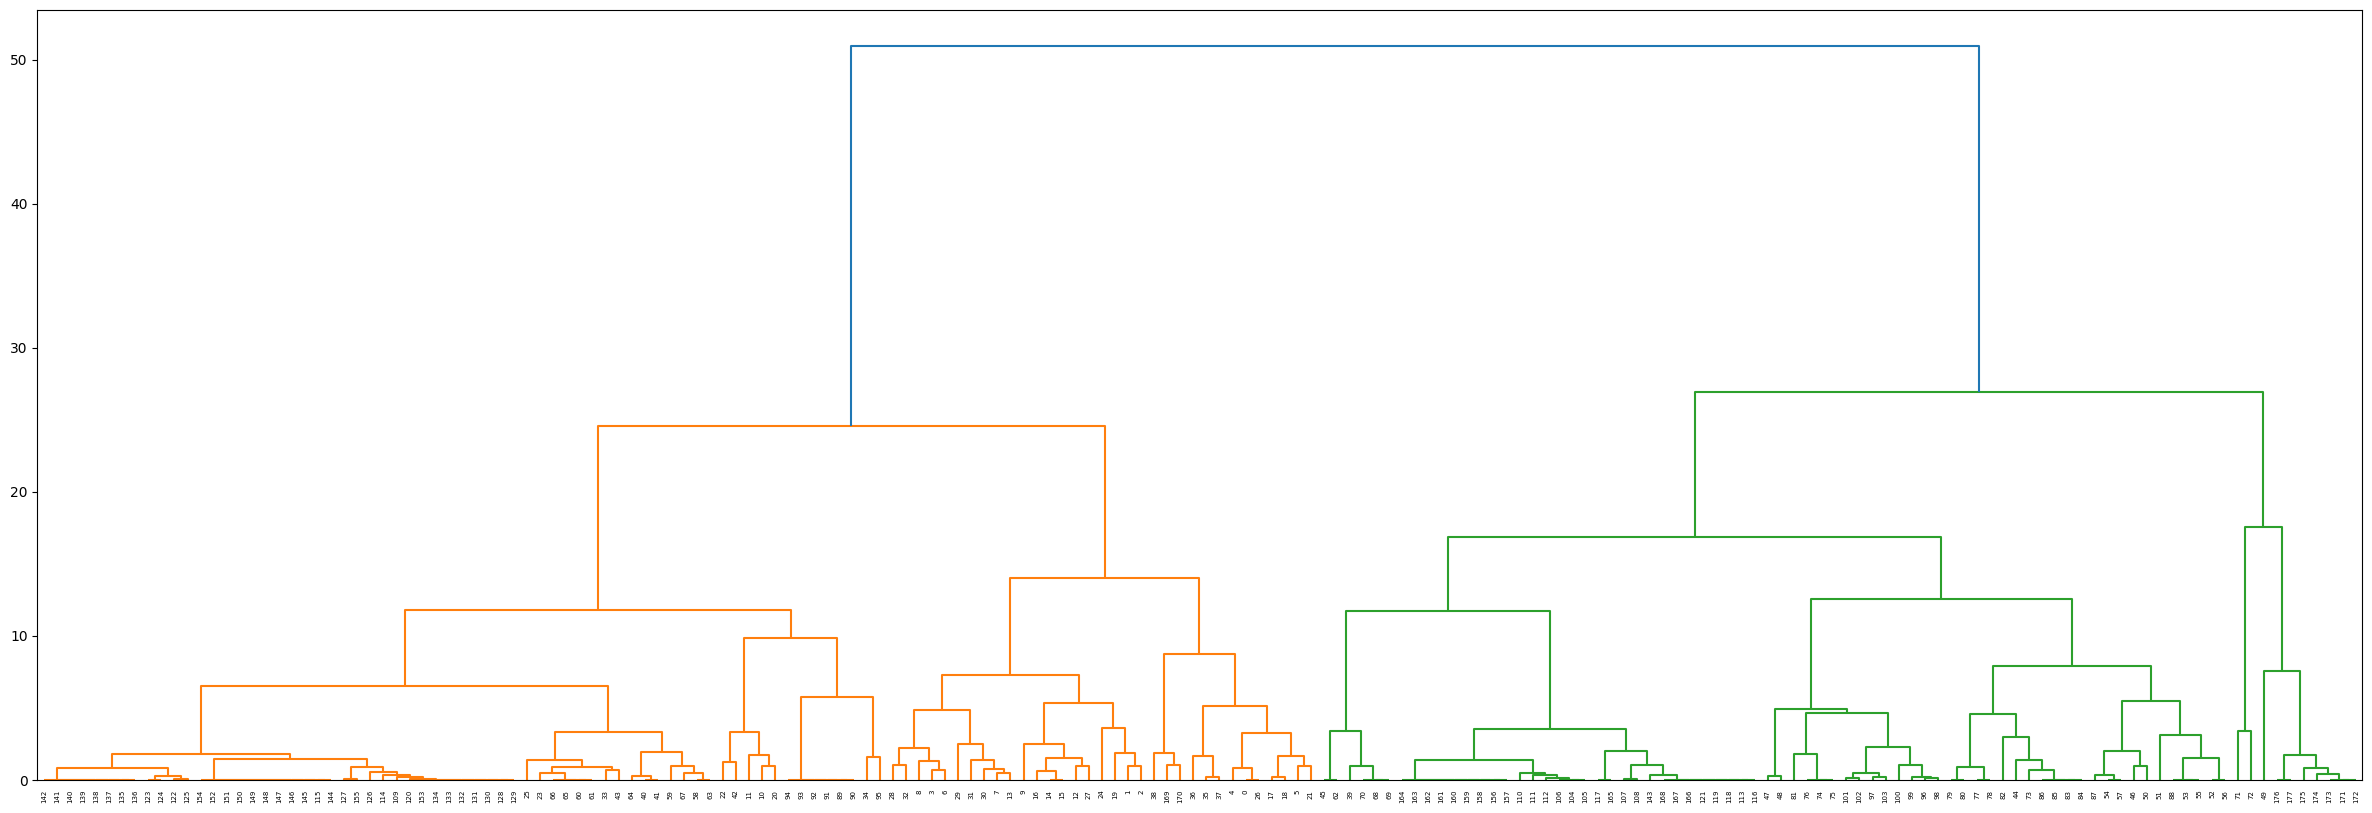

In [194]:
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import dendrogram, linkage

# generate the linkage matrix
X = data[['Latitude', 'Longitude']].values
Z = linkage(X,
            method='complete',  # dissimilarity metric: max distance across all pairs of
                                # records between two clusters
            metric='euclidean'
            )                           # you can peek into the Z matrix to see how clusters are
# merged at each iteration of the algorithm

# calculate full dendrogram and visualize it
plt.figure(figsize=(30, 10))
dendrogram(Z)
plt.show()

# retrive clusters with `max_d`
max_d = 5       # I assume that your `Latitude` and `Longitude` columns are both in
# units of miles
clusters = fcluster(Z, max_d, criterion='distance')
